<a href="https://colab.research.google.com/github/omingyun/omingyun/blob/main/7%EC%A1%B0_1%EC%B0%A8%EC%84%A4%EA%B3%84%EA%B3%BC%EC%A0%9C_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # numpy 라이브러리 선언 및 np로 호출
import torch # torch 라이브러리 선언
import torch.nn as nn # torch.nn 라이브러리 선언 및 nn으로 호출
import torch.nn.functional as func # torch.nn.functional 라이브러리 선언 및 func로 호출
import torch.optim as opt # torch.optim 라이브러리 선언 및 opt로 호출

from google.colab import drive  # drive mount
drive.mount("/content/drive", force_remount=True)

dataset = np.loadtxt(
    '/content/drive/MyDrive/Colab Notebooks/ESS_DATA.csv',
    delimiter=',',
    dtype=np.float32) # drive에서 dataset 가져오기

x_train = torch.FloatTensor(dataset[:,:-1])
y_train = torch.FloatTensor(dataset[:,[-1]])

model = nn.Linear(2,1) # Linear model 선언 및 입력변수 2개, 출력 변수 1개이므로 (2,1) 입력

optimizer = opt.SGD(model.parameters(), lr=0.000001) # Optimizer 설정. stochastic gradient descent 를 사용 (lr=0.000001로 설정)

for epoch in range(70000):
  y_hypo = model(x_train)
  cost = func.mse_loss(y_hypo, y_train) # mean square error 함수로 cost 계산

  optimizer.zero_grad() # gradient 0으로 초기화
  cost.backward() # 역전파(back propagation)를 통해 기울기 계산
  optimizer.step() # SGD를 통해 계산된 값을 가중치에 반영

  if epoch % 1000 == 999: # 1000번마다 중간 결과 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch+1, 70000, cost.item()))


Mounted at /content/drive
Epoch 1000/70000 Cost: 13.665103
Epoch 2000/70000 Cost: 0.969618
Epoch 3000/70000 Cost: 0.113953
Epoch 4000/70000 Cost: 0.056282
Epoch 5000/70000 Cost: 0.052395
Epoch 6000/70000 Cost: 0.052133
Epoch 7000/70000 Cost: 0.052115
Epoch 8000/70000 Cost: 0.052114
Epoch 9000/70000 Cost: 0.052114
Epoch 10000/70000 Cost: 0.052114
Epoch 11000/70000 Cost: 0.052114
Epoch 12000/70000 Cost: 0.052114
Epoch 13000/70000 Cost: 0.052114
Epoch 14000/70000 Cost: 0.052114
Epoch 15000/70000 Cost: 0.052114
Epoch 16000/70000 Cost: 0.052114
Epoch 17000/70000 Cost: 0.052114
Epoch 18000/70000 Cost: 0.052114
Epoch 19000/70000 Cost: 0.052114
Epoch 20000/70000 Cost: 0.052114
Epoch 21000/70000 Cost: 0.052114
Epoch 22000/70000 Cost: 0.052114
Epoch 23000/70000 Cost: 0.052114
Epoch 24000/70000 Cost: 0.052114
Epoch 25000/70000 Cost: 0.052114
Epoch 26000/70000 Cost: 0.052114
Epoch 27000/70000 Cost: 0.052114
Epoch 28000/70000 Cost: 0.052114
Epoch 29000/70000 Cost: 0.052114
Epoch 30000/70000 Cost: 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

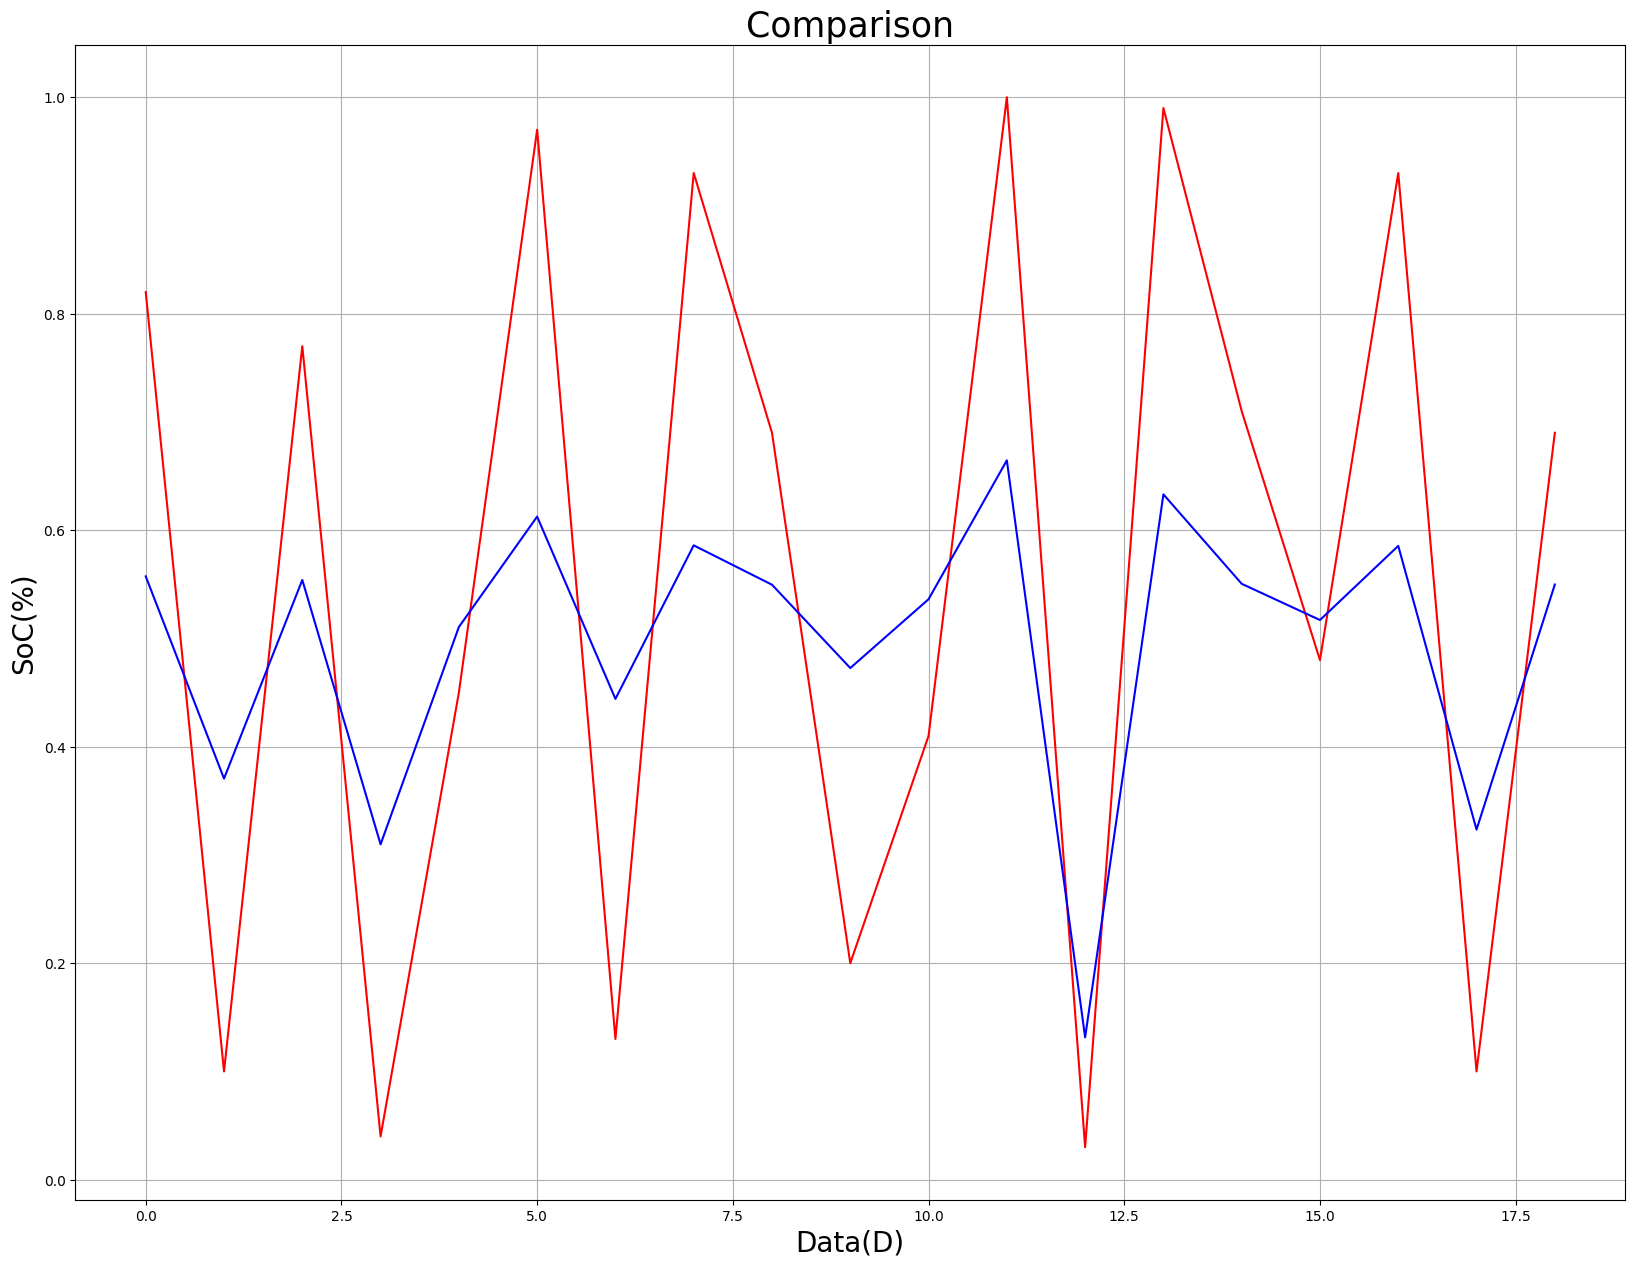

In [ ]:
import matplotlib.pyplot as pit # matplotlib.pyplot 라이브러리 선언 및 pit로 호출

np.random.shuffle(dataset) # dataset 랜덤으로 섞기

x_train_r = torch.FloatTensor(dataset[:,:-1])  # 랜덤한 dataset 값들의 모든행, 첫열부터 마지막열 전까지
y_train_r = torch.FloatTensor(dataset[:,[-1]]) # 랜덤한 dataset 값들의 모든행, 마지막열
y_hypo_r = model(x_train_r)                    # x_train_r을 선형함수에 넣어 y_hypo_r를 출력

x = np.arange(0,19)                            # x : x의 크기를 20으로 지정
y = y_train_r[:19,-1]                          # y : y_xtrain_r의 20가지 행을 지정
z = y_hypo_r                                   # z : y_hypo_r
z.view([-1])                                   # z의 shape를 [-1]의 값으로 변경
w = z[:19].detach().numpy()                    # z의 20가지 행을 지정

pit.figure(figsize=(20,15))                    # plot 크기 지정
pit.title('Comparison' , fontsize=25)          # plot 이름 지정
pit.xlabel('Data(D)' , fontsize=20)            # plot x축 label 지정
pit.ylabel('SoC(%)' , fontsize=20)             # plot y축 label 지정
pit.plot(x,y,'r-')                             # plot x-y의 그래프를 red line으로 그리기
pit.plot(x,w,'b-')                             # plot x-w의 그래프를 blue line으로 그리기
pit.grid()                                     # plot 격자
pit.show()                                     # plot 출력